## **ML ASSIGNMENT 2**

* SHREYA CHETAN PAWASKAR

* pawaskas@uci.edu

* STUDENT ID: 12041645

# Problem 1: Linear Regression from Scratch (30 points)

In [1]:
# import the necessary packages
import numpy as np
from matplotlib import pyplot as plt
np.random.seed(100)

Let's generate some data points first, by the equation $y = x - 3$. 

In [2]:
x = np.random.randint(100, size=100) / 30 - 2
X = x.reshape(-1, 1)

y = x + -3 + 0.3*np.random.randn(100)

Let's then visualize the data points we just created. 

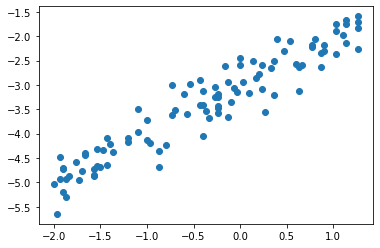

In [3]:
plt.scatter(X, y)

## 1.1 Gradient of vanilla linear regression model (5 points)

In the lecture, we learn that the cost function of a linear regression model can be expressed as **Equation 1**:

$$J(\theta)=\frac{1}{2 m} \sum_{i}^{m}\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right)^{2}$$ 

The gredient of it can be written as **Equation 2**:

$$\frac{\partial J(\theta)}{\partial \theta}= \frac{1}{m} \sum_{i}^{m}\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\cdot\right)\left(x^{(i)}\right)$$




## 1.2 Gradient of vanilla regularized regression model (5 points)

After adding the L2 regularization term, the linear regression model can be expressed as **Equation 3**:

$$J(\theta)=\frac{1}{2 m} \sum_{i}^{m}\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right)^{2}+\frac{\lambda}{2 m} \sum_{j}^{n} (\theta_{j})^{2}$$

The gredient of it can be written as **Equation 4**:

$$\frac{\partial J(\theta)}{\partial \theta}= \frac{1}{m} \sum_{i}^{m}\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\cdot\right)\left(x^{(i)}\right)+\frac{\lambda}{m} \sum_{j}^{n} (\theta_{j})$$

## 1.3 Implement the cost function of a regularized regression model (5 points)

Please implement the cost function of a regularized regression model according to the above equations.

## 1.4 Implement the gradient of the cost function of a regularized regression model (5 points)

Please implement the gradient of the cost function of a regularized regression model according to the above equations.

In [8]:
def regularized_linear_regression(X, y, alpha=0.01, lambda_value=1, epochs=30):
    """
    :param x: feature matrix
    :param y: target vector
    :param alpha: learning rate (default:0.01)
    :param lambda_value: lambda (default:1)
    :param epochs: maximum number of iterations of the
           linear regression algorithm for a single run (default=30)
    :return: weights, list of the cost function changing overtime
    """
 
    m = np.shape(X)[0]  # total number of samples
    n = np.shape(X)[1]  # total number of features
 
    X = np.concatenate((np.ones((m, 1)), X), axis=1)
    W = np.random.randn(n + 1, )
 
    # stores the updates on the cost function (loss function)
    cost_history_list = []
 
    # iterate until the maximum number of epochs
    for current_iteration in np.arange(epochs):  # begin the process
 
        # compute the dot product between our feature 'X' and weight 'W'
        y_estimated = X.dot(W)
 
        # calculate the difference between the actual and predicted value
        error = y_estimated - y

        
############################################################################################################## 
####################################### Begin of Question 1.3 ################################################
##############################################################################################################
      
        ##### Please write down your code here:####
        
        # calculate the cost (MSE) (Equation 1)
        cost_without_regularization = (1/(2*m))*np.sum(error**2)
        
        
        ##### Please write down your code here:####
        
        # regularization term
        reg_term = (lambda_value/(2*m))*np.sum(W**2)
        
        
        # calculate the cost (MSE) + regularization term (Equation 3)
        cost_with_regularization = cost_without_regularization + reg_term
        
############################################################################################################## 
####################################### End of Question 1.3 ##################################################
##############################################################################################################          
 
    
############################################################################################################## 
####################################### Begin of Question 1.4 ################################################
############################################################################################################## 
        
        ##### Please write down your code here:####
        
        # calculate the gradient of the cost function with regularization term (Equation )
        gradient = (1/m)*(error.dot(X)) + (lambda_value/m)*W
 

        # Now we have to update our weights
        W = W - alpha * gradient
        
############################################################################################################## 
####################################### End of Question 1.4 ##################################################
##############################################################################################################          
 
 
        # keep track the cost as it changes in each iteration
        cost_history_list.append(cost_with_regularization)
        
    # Let's print out the cost
    print(f"Cost with regularization: {cost_with_regularization}")
    print(f"Mean square error: {cost_without_regularization}")
 
    return W, cost_history_list

Run the following code to train your model. 

Hint: If you have the correct code written above, the cost should be $0.5181222986588751$ when $\lambda = 10$.

Cost with regularization: 0.05166098064877499
Mean square error: 0.05166098064877499


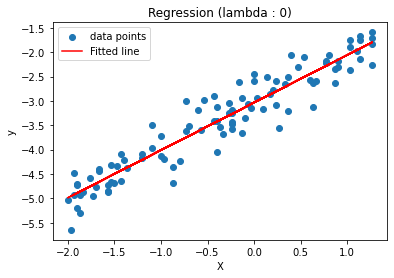

Cost with regularization: 0.5181222501897101
Mean square error: 0.0897090907779837


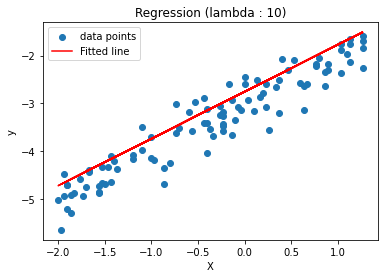

Cost with regularization: 2.7931724887400273
Mean square error: 1.2785106806082962


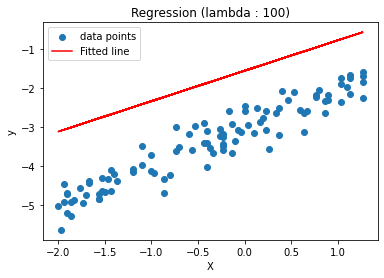

Cost with regularization: 5.591464362606628
Mean square error: 4.946888025066496


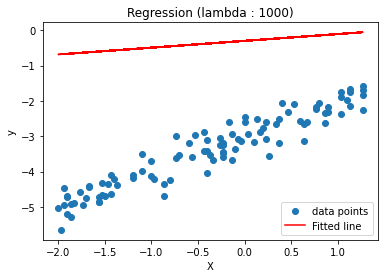

Cost with regularization: 6.2426956269339735
Mean square error: 6.1614425833558135


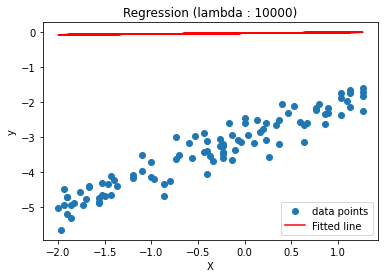

In [9]:
lambda_list = [0, 10, 100, 1000, 10000]
for lambda_ in lambda_list:
    # calls regression function with different values of lambda
    weight, _ = regularized_linear_regression(X, y, alpha=0.01,
                                 lambda_value=lambda_, epochs=1000)
    
    fitted_line = np.dot(X, weight[1]) + weight[0]
    
    plt.scatter(X, y, label='data points')
    plt.plot(X, fitted_line, color='r', label='Fitted line')
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title(f"Regression (lambda : {lambda_})")
    plt.legend()
    plt.show()

## 1.5 Analyze your results (10 points)


According to the above figures, what's the best choice of $\lambda$? 

Why the regressed line turns to be flat as we increase $\lambda$?

Your answer: 

**Answer 1:** 

* According to figures, best fit for $\lambda$ is 0.



**Answer 2:** 

* As lambda increases, the penalty term becomes larger, which leads to smaller coefficient values. 

* The parameters are penalized too much making it difficult for the model to train. 

* This results in a less flexible model (i.e., a simpler model with fewer features) and a flatter regression line.


# Problem 2: Getting familiar with PyTorch (30 points)

In [10]:
# Your code:
!pip install torch

     |████████████████████████████████| 135.3 MB 19.2 MB/s eta 0:00:01


In [13]:
import torch
import mltools as ml

1. Load the “ data/curve80.txt ” data set, and split it into 75% / 25% training/test. 
2. Use degree=5 for all the polynomial features.

In [16]:
data = np.genfromtxt("data/curve80.txt")
X = data[:,0]
X = np.atleast_2d(X).T # code expects shape (M,N) so make sure i t s 2-dimensional 
Y = data[:,1] # doesnt matter for Y
Xtr,Xte,Ytr,Yte = ml.splitData(X,Y,0.75) # split data set 75/25
degree = 5
XtrP = ml.transforms.fpoly(Xtr, degree=degree, bias=False) 
XtrP,params = ml.transforms.rescale(XtrP)

**Transform numpy arrays to tensor.** 
**Make sure the XtrP_tensor has the shape of (60, 5) while Ytr_tensor has the shape of (60, 1).**

In [17]:
XtrP_tensor =  torch.from_numpy(XtrP)
Ytr_tensor = torch.from_numpy(Ytr)
Ytr_tensor = torch.reshape(Ytr_tensor,(60,1))
XtrP_tensor = XtrP_tensor.float()
Ytr_tensor = Ytr_tensor.float()

In [19]:
print("XtrP_tensor Shape :",XtrP_tensor.size())
print("Ytr_tensor Shape :",Ytr_tensor.size())

XtrP_tensor Shape : torch.Size([60, 5])
Ytr_tensor Shape : torch.Size([60, 1])


**2. Initialize our linear regressor.**

In [20]:
linear_regressor = torch.nn.Linear(in_features= 5,out_features=1)

**3. Set up the criterion and optimizer.**

In [21]:
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(linear_regressor.parameters(),lr=0.1) 
epochs=100000

**4. Training the regressor using gradient descent.**

In [23]:
loss_record = []
for _ in range(epochs):
    optimizer.zero_grad() # set gradient to zero
    pred_y = linear_regressor(XtrP_tensor) 
    loss = criterion(pred_y, Ytr_tensor) # calculate loss function
    loss.backward() # backpropagate gradient
    loss_record.append(loss.item())
    optimizer.step() # update the parameters in the linear regressor
    

**5.  Plot the loss v.s. epochs. Show the plot here**

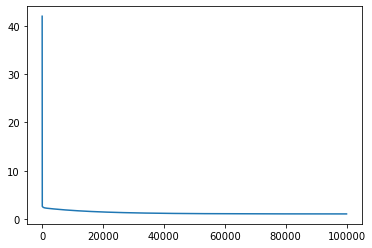

In [24]:
plt.plot(range(epochs), (loss_record))

**6. Visualize the trained linear regressor.**

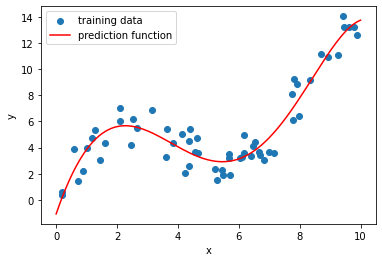

In [29]:
xs = np.linspace(0,10,200)
xs = xs[:,np.newaxis]
xsP, _ = ml.transforms.rescale(ml.transforms.fpoly(xs,degree=degree,bias=False), params) 
xsP_tensor = torch.from_numpy(xsP).float()
ys = linear_regressor(xsP_tensor)
plt.scatter(Xtr,Ytr,label="training data") 
plt.plot(xs,ys.detach().numpy(),label="prediction function",color = 'red') 
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Statement of Collaboration

1. https://towardsdatascience.com/regularisation-techniques-neural-networks-101-1f746ad45b72
2. https://towardsdatascience.com/linear-regression-with-pytorch-eb6dedead817
3. https://odesandcodes.wordpress.com/2017/06/25/implementing-vanilla-linear-regression-in-python/
4. https://machinelearningmastery.com/training-a-linear-regression-model-in-pytorch/